# NBA Finals Predictor 2024
## By Alexander Souza

## Cleaning, visualizing, and predicting using the Advanced Metrics gathered from Basketball Reference.

## Part 1: Cleaning

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
base_path = "/content/nba_data_"
years = range(2015, 2024)

dataframes = []

for year in years:
    file_path = f"{base_path}{year}_team.csv"
    df = pd.read_csv(file_path)
    df['Year'] = year
    dataframes.append(df)

In [133]:
df = pd.concat(dataframes)

In [134]:
df.head()

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,Unnamed: 22,OeFG%,OTOV%,ODRB%,OFT/FGA,Unnamed: 27,Arena,Attend.,Attend./G,Year
0,1.0,Golden State Warriors*,26.6,67.0,15.0,65,17,10.10,-0.09,10.01,...,NaN,0.470,14.3,74.5,0.217,NaN,Oracle Arena,803436.0,19596.0,2015
1,2.0,Los Angeles Clippers*,28.8,56.0,26.0,58,24,6.59,0.22,6.80,...,NaN,0.493,13.2,75.7,0.231,NaN,STAPLES Center,785892.0,19168.0,2015
2,3.0,San Antonio Spurs*,29.8,55.0,27.0,58,24,6.20,0.14,6.34,...,NaN,0.484,13.3,77.3,0.190,NaN,AT&T Center,762855.0,18606.0,2015
3,4.0,Atlanta Hawks*,27.8,60.0,22.0,56,26,5.43,-0.68,4.75,...,NaN,0.492,14.9,73.4,0.185,NaN,Philips Arena,713909.0,17412.0,2015
4,5.0,Cleveland Cavaliers*,26.9,53.0,29.0,53,29,4.48,-0.40,4.08,...,NaN,0.502,12.6,74.7,0.177,NaN,Quicken Loans Arena,843042.0,20562.0,2015


In [135]:
len(df)

279

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279 entries, 0 to 30
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rk           270 non-null    float64
 1   Team         279 non-null    object 
 2   Age          279 non-null    float64
 3   W            270 non-null    float64
 4   L            270 non-null    float64
 5   PW           279 non-null    int64  
 6   PL           279 non-null    int64  
 7   MOV          279 non-null    float64
 8   SOS          279 non-null    float64
 9   SRS          279 non-null    float64
 10  ORtg         279 non-null    float64
 11  DRtg         279 non-null    float64
 12  NRtg         270 non-null    float64
 13  Pace         279 non-null    float64
 14  FTr          279 non-null    float64
 15  3PAr         279 non-null    float64
 16  TS%          279 non-null    float64
 17  Unnamed: 17  0 non-null      float64
 18  eFG%         279 non-null    float64
 19  TOV%         2

## Features

### Rk: The power ranking of the team at the end of the season
### Team: Name of the team
### Age: Average age of the players on the team
### W: Total regular season wins
### L: Total regular season losses
### PW: Pythagorean wins, i.e., expected wins based on points scored and allowed
### PL: Pythagorean losses, i.e., expected losses based on points scored and allowed
### MOV: Average margin of victory
### SOS: Strength of Schedule; a rating of strength of schedule. The rating is denominated in points above/below average, where zero is average.
### SRS: Simple Rating System; a team rating that takes into account average point differential and strength of schedule. The rating is denominated in points above/below average, where zero is average.
### ORtg: An estimate of points produced (players) or scored (teams) per 100 possessions.
### DRtg: Defensive rating; an estimate of points allowed per 100 possessions.
### NRtg: Net Rating; an estimate of point differential per 100 possessions.
### Pace: An estimate of possessions per 48 minutes
### FTr: Free Throw Attempt Rate; Number of FT Attempts Per FG Attempt
### 3PAr: 3-Point Attempt Rate; Percentage of FG Attempts from 3-Point Range
### TS%: True Shooting Percentage; A measure of shooting efficiency that takes into account 2-point field goals, 3-point field goals, and free throws.
### eFG%: Effective Field Goal Percentage; This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.
### TOV%: Turnover Percentage; An estimate of turnovers committed per 100 plays.
### ORB%: Offensive Rebound Percentage; An estimate of the percentage of available offensive rebounds a player grabbed while they were on the floor.
### FT/FGA: Free Throws Per Field Goal Attempt
### OeFG%: Opponent Effective Field Goal Percentage
### OTOV%: Opponent Turnover Percentage
### ODRB%: Defensive Rebound Percentage; An estimate of the percentage of available defensive rebounds a player grabbed while they were on the floor.
### OFT/FGA: Opponent Free Throws Per Field Goal Attempt
### Arena: Where each team plays
### Attend.: Total fan attendance throughout the season
### Attend./G: Fan attendance per game
### Year: **Year**

These advanced stats were taken from Basketball-reference.com, and are already standardized for use in regression analysis.

I am manually adding a feature for champion to tell whether or not the team won it that year as Basketball-reference did not include this in their advanced stats.

In [137]:
champions = {
    2015: 'Golden State Warriors*',
    2016: 'Cleveland Cavaliers*',
    2017: 'Golden State Warriors*',
    2018: 'Golden State Warriors*',
    2019: 'Toronto Raptors*',
    2020: 'Los Angeles Lakers*',
    2021: 'Milwaukee Bucks*',
    2022: 'Golden State Warriors*',
    2023: 'Denver Nuggets*',
    2024: ''
}


df['Champion'] = df.apply(
    lambda row: 1 if champions[row['Year']] == row['Team'] else 0, axis=1
)

In [138]:
champions_df = df[df['Champion'] == 1]
print(champions_df)

    Rk                    Team   Age     W     L  PW  PL    MOV   SOS    SRS  \
0  1.0  Golden State Warriors*  26.6  67.0  15.0  65  17  10.10 -0.09  10.01   
3  4.0    Cleveland Cavaliers*  28.1  57.0  25.0  57  25   6.00 -0.55   5.45   
0  1.0  Golden State Warriors*  28.2  67.0  15.0  67  15  11.63 -0.28  11.35   
2  3.0  Golden State Warriors*  28.8  58.0  24.0  56  26   5.98 -0.19   5.79   
2  3.0        Toronto Raptors*  27.3  58.0  24.0  56  26   6.09 -0.60   5.49   
4  5.0     Los Angeles Lakers*  29.5  52.0  19.0  48  23   5.79  0.49   6.28   
3  4.0        Milwaukee Bucks*  28.1  46.0  26.0  48  24   5.89 -0.32   5.57   
4  5.0  Golden State Warriors*  27.6  53.0  29.0  55  27   5.54 -0.02   5.52   
5  6.0         Denver Nuggets*  26.6  53.0  29.0  49  33   3.33 -0.29   3.04   

   ...  OeFG%  OTOV%  ODRB%  OFT/FGA  Unnamed: 27                Arena  \
0  ...  0.470   14.3   74.5    0.217          NaN         Oracle Arena   
3  ...  0.496   12.6   78.5    0.205          NaN  

I want to get rid of some of the variables that are not important like arena and some blank stats so that they don't cause us any problems later.

In [139]:
df = df.drop('Attend.', axis=1)
df = df.drop('Arena', axis=1)
unnamed_cols = [col for col in df.columns if 'Unnamed' in col]

df = df.drop(unnamed_cols, axis=1)

df = df.dropna(axis=0)
df = df[df['Team'] != 'League Average']

In [140]:
df.head()

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,TOV%,ORB%,FT/FGA,OeFG%,OTOV%,ODRB%,OFT/FGA,Attend./G,Year,Champion
0,1.0,Golden State Warriors*,26.6,67.0,15.0,65,17,10.10,-0.09,10.01,...,13.1,24.1,0.184,0.470,14.3,74.5,0.217,19596.0,2015,1
1,2.0,Los Angeles Clippers*,28.8,56.0,26.0,58,24,6.59,0.22,6.80,...,11.6,22.8,0.215,0.493,13.2,75.7,0.231,19168.0,2015,0
2,3.0,San Antonio Spurs*,29.8,55.0,27.0,58,24,6.20,0.14,6.34,...,13.1,23.4,0.200,0.484,13.3,77.3,0.190,18606.0,2015,0
3,4.0,Atlanta Hawks*,27.8,60.0,22.0,56,26,5.43,-0.68,4.75,...,13.5,21.4,0.201,0.492,14.9,73.4,0.185,17412.0,2015,0
4,5.0,Cleveland Cavaliers*,26.9,53.0,29.0,53,29,4.48,-0.40,4.08,...,13.4,26.8,0.216,0.502,12.6,74.7,0.177,20562.0,2015,0


Now that we have removed na and extra variables, we can begin analyzing the data.

In [142]:
df.describe()

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,TOV%,ORB%,FT/FGA,OeFG%,OTOV%,ODRB%,OFT/FGA,Attend./G,Year,Champion
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,15.406015,28.488722,26.343609,39.932331,39.804511,40.018797,39.718045,0.036053,-0.003647,0.032256,...,12.732331,23.298120,0.201271,0.522128,12.739098,76.729699,0.201237,16183.755639,2018.969925,0.033835
std,8.674437,17.339938,1.710604,11.931690,11.743779,11.434622,11.286969,4.629336,0.319687,4.484673,...,0.963292,2.307191,0.019946,0.020852,1.076426,1.809321,0.019810,5102.274978,2.594449,0.181144
min,1.000000,0.000000,22.100000,10.000000,9.000000,16.000000,15.000000,-10.230000,-0.930000,-9.920000,...,9.900000,17.900000,0.143000,0.470000,10.300000,71.600000,0.157000,162.000000,2015.000000,0.000000
25%,8.000000,13.250000,25.100000,32.000000,31.000000,33.000000,32.000000,-2.922500,-0.220000,-2.885000,...,12.100000,21.600000,0.188000,0.507000,11.900000,75.600000,0.188000,15964.000000,2017.000000,0.000000
50%,15.000000,28.000000,26.200000,42.000000,39.000000,41.000000,39.000000,0.430000,0.000000,0.295000,...,12.700000,23.200000,0.200000,0.523000,12.700000,76.800000,0.201000,17449.500000,2019.000000,0.000000
75%,23.000000,44.000000,27.400000,48.000000,48.000000,48.750000,47.000000,3.152500,0.220000,2.965000,...,13.300000,24.700000,0.214000,0.539000,13.500000,77.800000,0.214750,19000.750000,2021.000000,0.000000
max,30.000000,58.000000,30.600000,73.000000,72.000000,67.000000,66.000000,11.630000,0.790000,11.350000,...,16.000000,31.100000,0.276000,0.576000,16.300000,81.600000,0.264000,21821.000000,2023.000000,1.000000


All of our columns of data seem to be well sorted and standardized.

In order to handle categorical variables properly we have to convert our team names using label encoder.

In [143]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Team'] = encoder.fit_transform(df['Team'])

# Part 2: Visualization

In [145]:
sns.set_style("white")

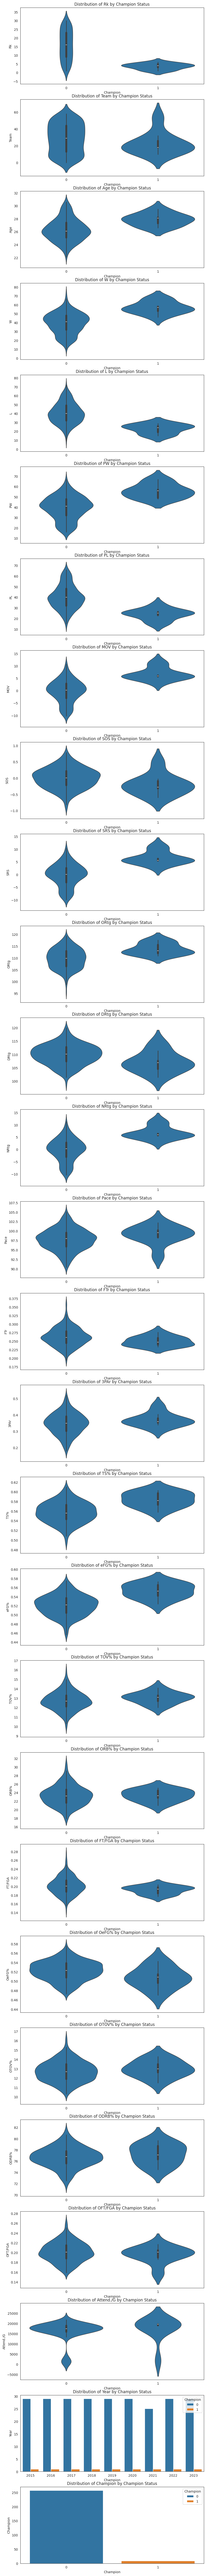

In [149]:
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(10, 5 * len(df.columns)))

for i, col in enumerate(df.columns):
    if df[col].dtype == 'O' or len(df[col].unique()) < 10:
        sns.countplot(data=df, x=col, hue='Champion', ax=axes[i])
    else:
        sns.violinplot(data=df, x='Champion', y=col, ax=axes[i])

    axes[i].set_title(f'Distribution of {col} by Champion Status')
    axes[i].set_xlabel('Champion')
    axes[i].set_ylabel(col)


From these plots we can see that there are a lot of features where the champion tends to sway in a direction or the other. This is good for us predicting the championn as it tells us that champions tend to be a certain type of way. Of courwe there are outliers, but for the most part these graphs are a good sign.

We also can get rid of some features that vary heavily for the champions of each year.

<Axes: xlabel='Champion', ylabel='Team'>

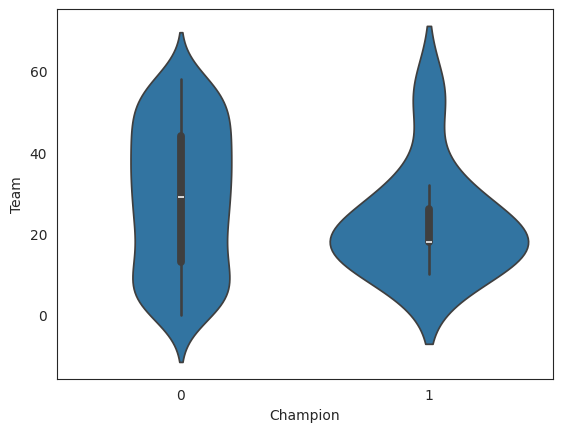

In [150]:
sns.violinplot(data=df, x='Champion', y='Team')

We can remove team as this is not an important feature.

<Axes: xlabel='Champion', ylabel='NRtg'>

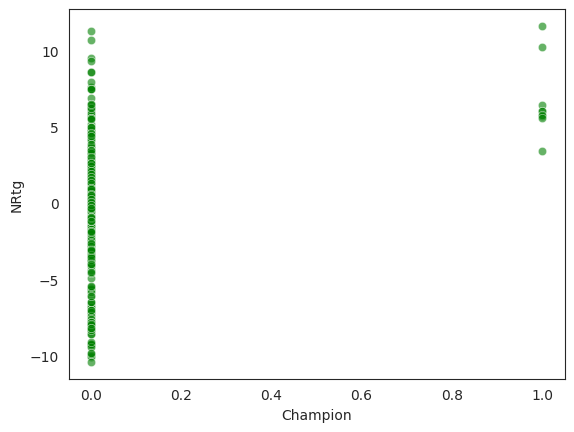

In [154]:
sns.scatterplot(x = "Champion", y = "NRtg", data = df, alpha= 0.6, color="green")

On the opposite side of the spectrum, Net Rating is a very good determining factor for Champion as a team that wins the championship has to play better than the opponent. In this scatterplot we can see that it is tough to pick solely on this metric alone because a lot of teams have a good net rating, and we can see that the team with the best net rating doesn't always win the championship. We will have to rely on all of our features combined to produce accurate results.

# Part 3: Prediction

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, 0 to 29
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rk         266 non-null    float64
 1   Team       266 non-null    int64  
 2   Age        266 non-null    float64
 3   W          266 non-null    float64
 4   L          266 non-null    float64
 5   PW         266 non-null    int64  
 6   PL         266 non-null    int64  
 7   MOV        266 non-null    float64
 8   SOS        266 non-null    float64
 9   SRS        266 non-null    float64
 10  ORtg       266 non-null    float64
 11  DRtg       266 non-null    float64
 12  NRtg       266 non-null    float64
 13  Pace       266 non-null    float64
 14  FTr        266 non-null    float64
 15  3PAr       266 non-null    float64
 16  TS%        266 non-null    float64
 17  eFG%       266 non-null    float64
 18  TOV%       266 non-null    float64
 19  ORB%       266 non-null    float64
 20  FT/FGA     266 n

Only use numeric values and drop what we are trying to predict.

In [164]:
features = df.drop(['Rk', 'Year', 'Champion'], axis=1)
target = df['Champion']

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=61)

In [182]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression()

In [183]:
lm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [184]:
predictions = lm.predict(X_test)

In [187]:
from sklearn import metrics

In [188]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, predictions))
print("Room Mean Squred Error: ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error:  0.07407407407407407
Mean Squared Error:  0.07407407407407407
Room Mean Squred Error:  0.2721655269759087


On average, our prediction of the champion is off by about 0.07% which is pretty good, but I think we can still get better.

In [179]:
classifier = RandomForestClassifier(n_estimators=100, random_state=61)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=61)

In [173]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = classifier.predict(X_test)

In [174]:
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.00      0.00      0.00         2

    accuracy                           0.94        54
   macro avg       0.48      0.49      0.49        54
weighted avg       0.93      0.94      0.94        54

Accuracy: 0.9444444444444444


Now we need to prepare our data that we are trying to predict.

In [175]:
df_2024 = pd.read_csv('/content/nba_data_2024_team.csv')

df_2024 = df_2024.drop('Attend.', axis=1)
df_2024 = df_2024.drop('Arena', axis=1)



unnamed_cols = [col for col in df_2024.columns if 'Unnamed' in col]

df_2024 = df_2024.drop(unnamed_cols, axis=1)

df_2024 = df_2024.dropna(axis=0)

In [176]:
encoder = LabelEncoder()
df_2024['Team'] = encoder.fit_transform(df_2024['Team'])

In [177]:
columns_used_in_training = [col for col in X_train.columns]


df_2024 = df_2024[columns_used_in_training]

probabilities_2024 = classifier.predict_proba(df_2024)
df_2024['Champion_Probability'] = probabilities_2024[:, 1]

df_2024['Team'] = encoder.inverse_transform(df_2024['Team'])

highest_probability_team = df_2024.sort_values(by='Champion_Probability', ascending=False).iloc[0]
print(f"The team predicted to win the championship is: {highest_probability_team['Team']} with a probability of {highest_probability_team['Champion_Probability']:.2f}")
top_teams = df_2024[['Team', 'Champion_Probability']].sort_values(by='Champion_Probability', ascending=False).head(10)
print(top_teams)

The team predicted to win the championship is: Boston Celtics* with a probability of 0.57
                      Team  Champion_Probability
0          Boston Celtics*                  0.57
18      Los Angeles Lakers                  0.27
1   Oklahoma City Thunder*                  0.26
13          Indiana Pacers                  0.23
6    Los Angeles Clippers*                  0.21
7         Milwaukee Bucks*                  0.15
8             Phoenix Suns                  0.15
3          Denver Nuggets*                  0.07
16        Sacramento Kings                  0.07
4          New York Knicks                  0.04
